In [ ]:
import pandas as pd
import os, cv2, keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont
from keras import layers

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
!unzip drive/MyDrive/kuzushiji/kuzushiji_resized3.zip

Archive:  drive/MyDrive/kuzushiji/kuzushiji_resized3.zip
replace kuzushiji_resized3/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('kuzushiji_resized3/train.csv')

In [ ]:
df

,image_id,labels
0,100241706_00004_2,U+306F 303.65349417637276 894.42436757873 34.3...
1,100241706_00005_1,U+306F 269.4778428093646 520.9086215797626 26....
2,100241706_00005_2,U+306F 140.3956953642384 355.1884357253485 32....
3,100241706_00006_1,U+3082 365.2900084674005 774.318064848173 16.7...
4,100241706_00007_2,U+309D 297.73954849498335 762.4095139607033 6....
...,...,...
3600,umgy012-038,U+30FD 301.31554524361957 272.16494845360825 7...
3601,umgy012-039,U+309D 140.26540810660745 156.0574948665298 10...
3602,umgy012-040,U+30DE 228.23251847640708 112.2168840082361 23...
3603,umgy012-041,U+309D 508.469376693767 272.6036709721278 5.43...


In [ ]:
X_data = []
y_data = []  # 62 x 37
count = 0
for index, row in df[:2500].iterrows():
    image_id = row[0]
    labels = row[1]
    image_fn = 'kuzushiji_resized3/train_images/{}.jpg'.format(image_id)
    imsource = Image.open(image_fn).convert('RGBA')
    image = np.asarray(imsource)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    X_data.append(image)

    ls = labels.split(' ')
    index = len(ls) - 1
    ls1 = ls[:index]
    labels1 = np.array(ls1).reshape(-1, 5)
    # labels2 = np.zeros((60, 35, 5), dtype=np.float32)
    labels2 = np.zeros((62, 37, 6), dtype=np.float32)

    # i = 0
    # for mx in range(37):
    #     if i >= len(labels1):
    #         break
    #     for my in range(62):
    #         # channels = y[my][mx]
    #         codepoint, x1, y1, x2, y2 = labels1[i]
    #         x1, y1, x2, y2 = float(x1), float(y1), float(x2), float(y2)
    #         labels2[my][mx] = [1, x1, y1, x2, y2]
    #         i += 1
    #         if i >= len(labels1):
    #             break
    for codepoint, px, py, w, h in labels1:
        mx, my = (float(px) + float(w)/2.0) // 16, (float(py) + float(h)/2.0) // 16
        mx = int(mx)
        my = int(my)

        if labels2[my][mx].any() > 0:
            # print(my, mx)
            # print(px, py, w, h)
            # print(labels2[my][mx])
            # count += 1
            continue

        x1 = float(px) - (mx * 16)
        y1 = float(py) - (my * 16)
        x2 = float(w)
        y2 = float(h)
        labels2[my][mx] = [1, x1, y1, x2, y2, 1]

    y_data.append(labels2)

X_data = np.array(X_data)
y_data = np.array(y_data)
# print(count)

In [ ]:
# def visualize_training_data(image_fn, y):
#     ls = labels.split(' ')
#     index = len(ls) - 1
#     ls1 = ls[:index]
#     labels1 = np.array(ls1).reshape(-1, 5)

#     imsource = Image.open(image_fn).convert('RGBA')
#     bbox_canvas = Image.new('RGBA', imsource.size)
#     char_canvas = Image.new('RGBA', imsource.size)
#     bbox_draw = ImageDraw.Draw(bbox_canvas)
#     char_draw = ImageDraw.Draw(char_canvas)

#     for mx in range(37):
#         for my in range(62):
#             channels = y[my][mx]
#             prob, x1, y1, x2, y2 = channels
#             px, py = (mx * 16) + x1, (my * 16) + y1

#             bbox_draw.rectangle((int(px), int(py), int(px + x2), int(py + y2)), fill=(255, 255, 255, 0), outline=(255, 0, 0, 255))

#     imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
#     imsource = imsource.convert("RGB") # Remove alpha for saving in jpg format.
#     return np.asarray(imsource)

In [ ]:
# img_id, labels = df.values[345]
# viz = visualize_training_data('kuzushiji_resized3/train_images/{}.jpg'.format(img_id), y_data[345])

In [ ]:
# plt.figure(figsize=(15, 15))
# plt.title(img_id)
# plt.imshow(viz, interpolation='lanczos')
# plt.show()

In [ ]:
# count

In [ ]:
X_data.shape

(2500, 1000, 593)

In [ ]:
y_data.shape

(2500, 62, 37, 6)

In [ ]:
x = x_input = layers.Input(shape=(1000, 593, 1))

x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)  # size: 500x296

x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)  # size: 500x296

x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)  # size: 250x148

x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)  # size: 250x148

x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)  # size: 125x74

x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)
x = layers.BatchNormalization()(x)  # size: 62x37

x_prob = layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid', name='x_prob')(x)
x_boxes = layers.Conv2D(4, kernel_size=3, padding='same', name='x_boxes')(x)
x_cls = layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid', name='x_cls')(x)


gate = tf.where(x_prob > 0.5, tf.ones_like(x_prob), tf.zeros_like(x_prob))
x_boxes = x_boxes * gate
x_cls = x_cls * gate

x = layers.Concatenate()([x_prob, x_boxes, x_cls])

In [ ]:
model = tf.keras.models.Model(x_input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000, 593,   0           []                               
                                1)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 1000, 593, 3  320         ['input_1[0][0]']                
                                2)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 500, 296, 32  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
idx_p = [0]
idx_bb = [1, 2, 3, 4]
idx_cls = [5]

In [ ]:
@tf.function
def loss_bb(y_true, y_pred):
    y_true = tf.gather(y_true, idx_bb, axis=-1)
    y_pred = tf.gather(y_pred, idx_bb, axis=-1)

    loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
    return tf.reduce_mean(loss[loss > 0.0])


@tf.function
def loss_p(y_true, y_pred):
    y_true = tf.gather(y_true, idx_p, axis=-1)
    y_pred = tf.gather(y_pred, idx_p, axis=-1)

    loss = tf.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_sum(loss)


@tf.function
def loss_cls(y_true, y_pred):
    y_true = tf.gather(y_true, idx_cls, axis=-1)
    y_pred = tf.gather(y_pred, idx_cls, axis=-1)
    
    loss = tf.losses.binary_crossentropy(y_true, y_pred)
    return tf.reduce_sum(loss)


@tf.function
def loss_func(y_true, y_pred):
    return loss_bb(y_true, y_pred) + loss_p(y_true, y_pred) + loss_cls(y_true, y_pred)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_func, optimizer=opt, metrics=["accuracy"])

In [ ]:
batch_size = 16
# X_train, y_train = X_data, y_data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=42)

x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.5, shuffle=True, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_validation.shape, y_validation.shape)

(2000, 1000, 593) (2000, 62, 37, 6)
(250, 1000, 593) (250, 62, 37, 6)
(250, 1000, 593) (250, 62, 37, 6)


In [ ]:
# checkpoint_path = "training_kuzu1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# from tensorflow.python.client import device_lib 
# print(device_lib.list_local_devices())

In [ ]:
# tf.config.run_functions_eagerly(True)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_validation, y_validation), batch_size=batch_size, epochs=30, shuffle=True) #, callbacks=[cp_callback])

Epoch 1/30
125/125 [==============================] - 69s 392ms/step - loss: 29237.2148 - accuracy: 0.8608 - val_loss: 47090.2656 - val_accuracy: 0.9195
Epoch 2/30
125/125 [==============================] - 47s 376ms/step - loss: 22037.5586 - accuracy: 0.9381 - val_loss: 21870.8574 - val_accuracy: 0.9345
Epoch 3/30
125/125 [==============================] - 48s 387ms/step - loss: 19769.4570 - accuracy: 0.9434 - val_loss: 14175.8301 - val_accuracy: 0.9362
Epoch 4/30
125/125 [==============================] - 48s 386ms/step - loss: 18036.5996 - accuracy: 0.9474 - val_loss: 17447.9512 - val_accuracy: 0.9492
Epoch 5/30
125/125 [==============================] - 48s 386ms/step - loss: 17076.1348 - accuracy: 0.9495 - val_loss: 13605.4043 - val_accuracy: 0.9461
Epoch 6/30
125/125 [==============================] - 47s 378ms/step - loss: 16505.7480 - accuracy: 0.9510 - val_loss: 16028.1846 - val_accuracy: 0.9515
Epoch 7/30
125/125 [==============================] - 47s 378ms/step - loss: 15596

In [ ]:
train_score = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: ", train_score[1])

63/63 [==============================] - 14s 181ms/step - loss: 17170.9648 - accuracy: 0.9682
Training Accuracy:  0.9681695699691772


In [ ]:
test_score = model.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy: ", test_score[1])

8/8 [==============================] - 4s 468ms/step - loss: 24323.8770 - accuracy: 0.9607
Test Accuracy:  0.9606695771217346


In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [ ]:
x_test[0].shape

(1000, 593)

In [ ]:
y_pred = model.predict(x_test)

8/8 [==============================] - 2s 180ms/step


In [ ]:
y_pred.shape

(250, 62, 37, 6)

In [ ]:
def get_color_by_probability(p):
    if p < 0.3:
        return (1., 0., 0.)
    if p < 0.7:
        return (1., 1., 0.)
    return (0., 1., 0.)

In [ ]:
def show_predict(X, y, threshold=0.1):
    X = X.copy()
    for mx in range(37):
        for my in range(62):
            channels = y[my][mx]
            prob, x1, y1, x2, y2, cls = channels

            # if prob < threshold we won't show any thing
            if prob < threshold:
                continue
                
            color = get_color_by_probability(prob)
            # bounding box
            px, py = (mx * 16) + x1, (my * 16) + y1
            cv2.rectangle(X, (int(px), int(py)), (int(px + x2), int(py + y2)), color, 1)
            
            # label
            # cv2.rectangle(X, (int(px), int(py - 10)), (int(px + 12), int(py)), color, -1)

    plt.figure(figsize=(15, 15))
    # plt.imshow(X, cmap='gray', interpolation='lanczos')
    plt.imshow(X, interpolation='lanczos')
    plt.show()
    # plt.imshow(X)

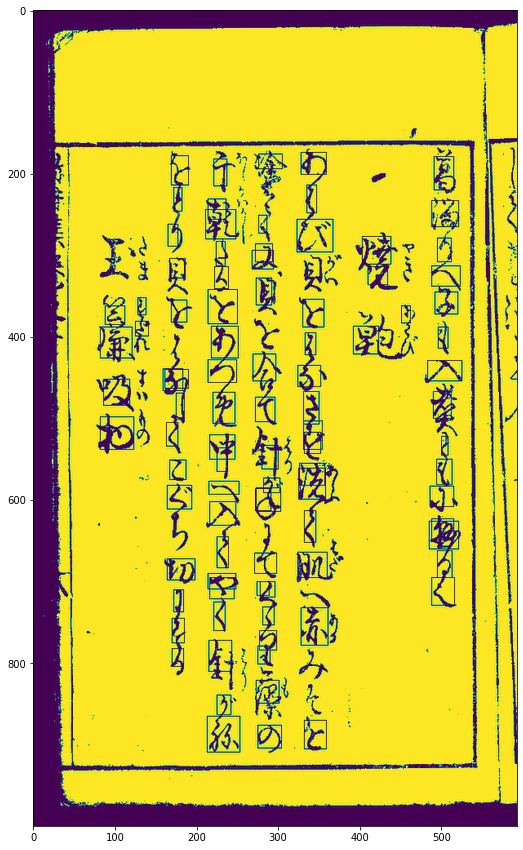

In [ ]:
show_predict(x_test[0], y_pred[0])

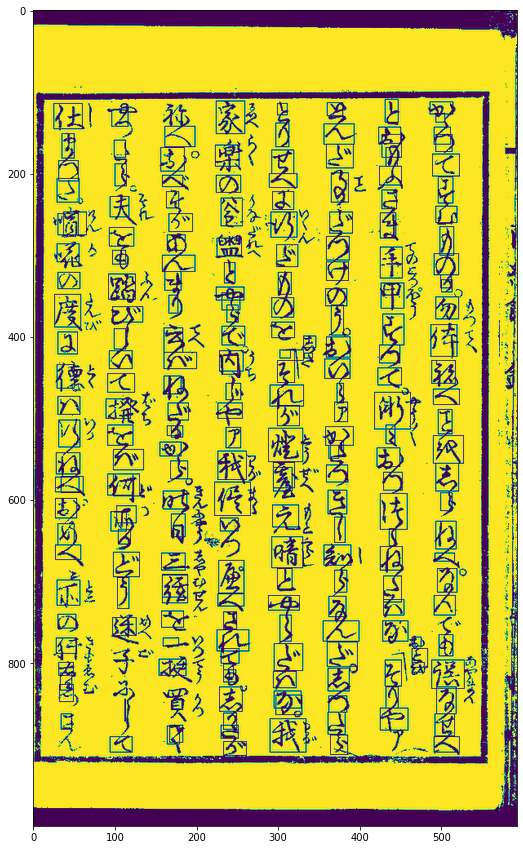

In [ ]:
show_predict(x_test[20], y_pred[20])

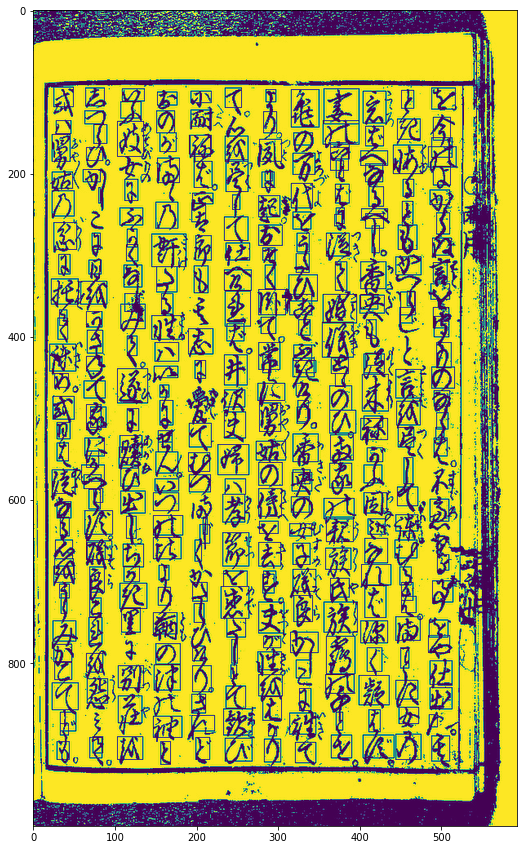

In [ ]:
show_predict(x_test[60], y_pred[60])